In [16]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
csv_filename = ""
if csv_filename:
    df_runs = pd.read_csv()
else:
    list_of_files = glob.glob('stats/*')
    latest_run = max(list_of_files, key=os.path.getctime)
    df_runs = pd.read_csv(latest_run + "/runs.out")
    df_cache = pd.read_csv(latest_run + "/cache.out")
df_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4200 non-null   object 
 1   optim      4200 non-null   int64  
 2   size       4200 non-null   int64  
 3   time       4200 non-null   float64
 4   bandwidth  4200 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 164.2+ KB


In [18]:
def create_scatter_subplot(ax, data, optims, name, scale="linear"):
    for optim in optims:
        optim_data = data[data[:,1] == optim]
        x = np.array(optim_data[:,2], dtype=np.float32) # Get matrix sizes
        y = np.array(optim_data[:,3], dtype=np.float32) # Get execution time
        if scale == "log":
            plt.yscale("log")
        ax.scatter(x, y, label=f"-O{optim}")
        ax.legend(loc="upper left")
        ax.set_ylabel("Seconds")
        ax.set_xlabel("Matrix size")
        ax.title.set_text(name)

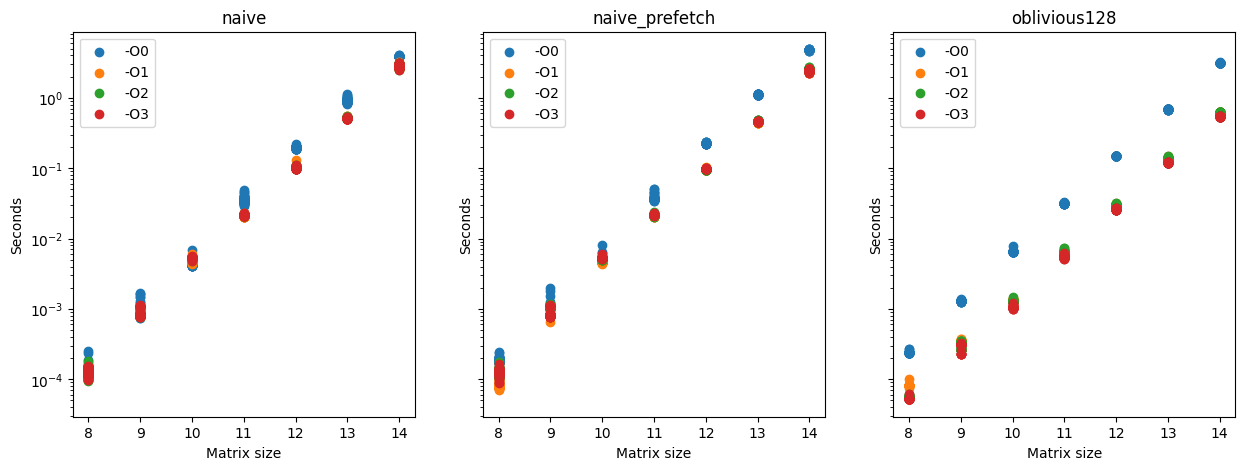

In [19]:
optims = df_runs["optim"].unique()
names = df_runs["name"].unique()

fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

for i, name in enumerate(names):
    data = df_runs[df_runs["name"] == name].to_numpy()
    create_scatter_subplot(ax[i], data, optims, name, scale="log")
plt.show()

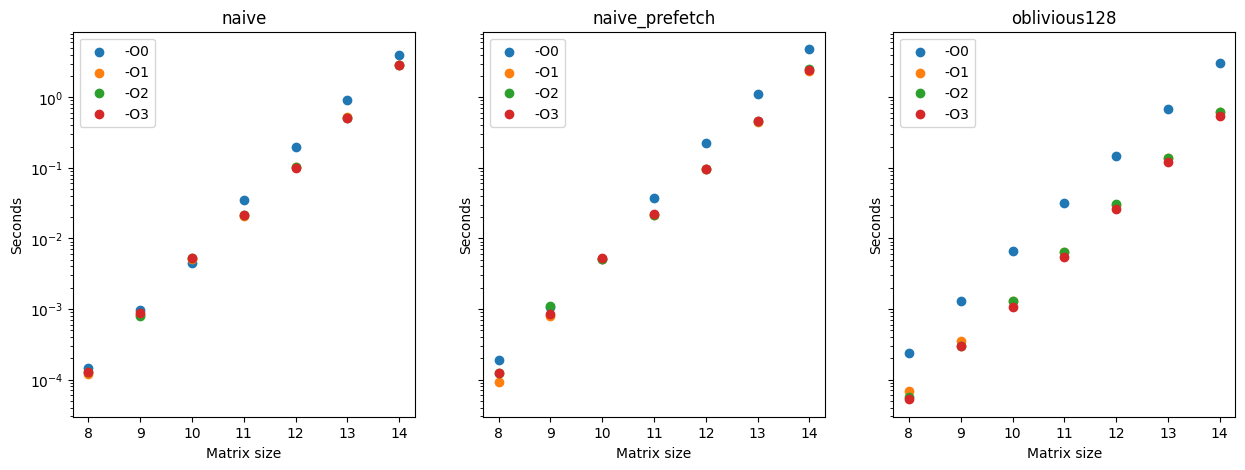

In [20]:
fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

means = df_runs.groupby(['name', 'optim', 'size']).mean()
stds = df_runs.groupby(['name', 'optim', 'size']).std()
for i, name in enumerate(names):
    for optim in optims:
        datapoints = means.loc[name, optim]
        x = list(datapoints.index)
        y = list(datapoints['time'])
        plt.yscale("log")
        ax[i].scatter(x, y, label=f"-O{optim}")
        ax[i].legend(loc="upper left")
        ax[i].set_ylabel("Seconds")
        ax[i].set_xlabel("Matrix size")
        ax[i].title.set_text(name)
plt.show()

In [21]:
optim_lvl = 3
means.loc['oblivious128', optim_lvl]

,time,bandwidth
size,,
8,0.000053,9.966375e+09
9,0.000300,7.062335e+09
10,0.001058,7.938071e+09
11,0.005392,6.232216e+09
12,0.026147,5.134742e+09
13,0.119798,4.481941e+09
14,0.541030,3.969381e+09


In [22]:
df_cache

,name,Ir,I1mr,ILmr,Dr,D1mr,DLmr,Dw,D1mw,DLmw
0,naive-0,28151086133,1558,1546,9126769923,142619523,142611044,2550145264,16777913,16777870
1,naive-1,20635221429,1546,1539,5100303731,142619526,142611050,2415919374,16777913,16777869
2,naive-2,20635221368,1545,1538,5100303715,142619526,142611051,2415919364,16777912,16777868
3,naive-3,20635155899,1546,1539,5100303731,142619525,142611050,2415919373,16777913,16777869
4,naive_prefetch-0,31103695970,1556,1544,9529398540,142619526,142611045,2550145277,16777911,16777871
5,naive_prefetch-1,20903722422,1549,1542,5100352879,142628423,142611070,2415935760,16777908,16777867
6,naive_prefetch-2,20903820733,1550,1543,5100402031,142637296,142611084,2415935767,16777909,16777868
7,naive_prefetch-3,21037866424,1547,1540,5100320115,142628421,142611068,2415935761,16777909,16777868
8,oblivious128-0,82715504290,1564,1552,32333070330,169389823,41547753,6107073489,33566242,33555450
9,oblivious128-1,43513704148,1549,1542,10869749099,169301607,41547768,5501004724,33561871,33555430
